In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('indian_liver_patient.csv')


In [2]:
# Convert categorical variables to numerical
data['Gender'] = data['Gender'].apply(lambda x: 1 if x=='Male' else 0)
data['Dataset'] = data['Dataset'].apply(lambda x: 1 if x==1 else 0)

# Handle missing values
data = data.dropna()


In [3]:
# Split the data into training and testing sets
X = data.drop('Dataset', axis=1)
y = data['Dataset']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Create a decision tree classifier
dtc = DecisionTreeClassifier()

# Train the classifier on the training data
dtc.fit(X_train, y_train)

# Make predictions on the testing data
dtc_train_pred = dtc.predict(X_train)
dtc_test_pred = dtc.predict(X_test)
# Calculate the accuracy of the classifier
print("Training accuracy Entropy: ", accuracy_score(y_train, dtc_train_pred))
print("testing accuracy entropy: ", accuracy_score(y_test, dtc_test_pred))


Training accuracy Entropy:  1.0
testing accuracy entropy:  0.5862068965517241


[Text(0.6595341930650684, 0.975, 'X[4] <= 212.5\ngini = 0.388\nsamples = 463\nvalue = [122, 341]'),
 Text(0.480027290239726, 0.925, 'X[2] <= 1.65\ngini = 0.478\nsamples = 236\nvalue = [93, 143]'),
 Text(0.3778627996575342, 0.875, 'X[9] <= 1.65\ngini = 0.498\nsamples = 183\nvalue = [86, 97]'),
 Text(0.3641641695205479, 0.825, 'X[0] <= 21.5\ngini = 0.495\nsamples = 177\nvalue = [80, 97]'),
 Text(0.3144263698630137, 0.775, 'X[3] <= 0.15\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.3007277397260274, 0.725, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.328125, 0.725, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.4139019691780822, 0.775, 'X[4] <= 132.5\ngini = 0.49\nsamples = 166\nvalue = [71, 95]'),
 Text(0.3555222602739726, 0.725, 'X[2] <= 0.85\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.3418236301369863, 0.675, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.3692208904109589, 0.675, 'X[8] <= 3.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.

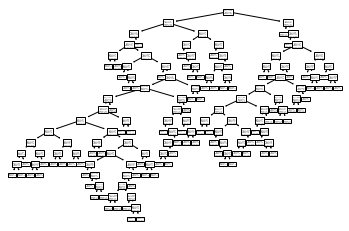

In [16]:
from sklearn.tree import plot_tree
plot_tree(dtc)

In [17]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
y_train_pred = dtc.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training accuracy of Decision Tree algorithm:", train_accuracy)

Training accuracy of Decision Tree algorithm: 1.0


In [19]:
y_test_pred = dtc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing accuracy of Decision Tree algorithm:", test_accuracy)

Testing accuracy of Decision Tree algorithm: 0.5862068965517241


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [21]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Fit a logistic regression model to the training data
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [23]:
# Predict the target variable for the training and testing data
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [24]:
# Compute the accuracy of the model on the training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training accuracy of logistic regression model:", train_accuracy)
print("Testing accuracy of logistic regression model:", test_accuracy)

Training accuracy of logistic regression model: 0.7537796976241901
Testing accuracy of logistic regression model: 0.6551724137931034


In [25]:
from sklearn.linear_model import Perceptron
p = Perceptron(penalty='l2',random_state=42)
p.fit(X_train,y_train)
train_pred=p.predict(X_train)
test_pred=p.predict(X_test)
print("training accuracy: ", accuracy_score(train_pred, y_train))
print("Testing accuracy: ", accuracy_score(test_pred,y_test))

training accuracy:  0.6825053995680346
Testing accuracy:  0.6120689655172413


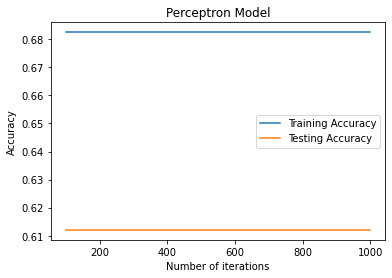

In [26]:
import matplotlib.pyplot as plt

# Fit the Perceptron model and get the training and testing accuracies
train_accuracies = []
test_accuracies = []
for i in range(1, 11):
    p = Perceptron(penalty='l2', random_state=42, max_iter=i*100)
    p.fit(X_train, y_train)
    train_pred = p.predict(X_train)
    test_pred = p.predict(X_test)
    train_accuracy = accuracy_score(train_pred, y_train)
    test_accuracy = accuracy_score(test_pred, y_test)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the training and testing accuracies
plt.plot(range(100, 1100, 100), train_accuracies, label='Training Accuracy')
plt.plot(range(100, 1100, 100), test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Perceptron Model')
plt.legend()
plt.show()

In [27]:
from sklearn.svm import SVC

In [28]:
svc1=SVC(kernel='rbf')
svc1.fit(X_train,y_train)

SVC()

In [29]:
svc_train_pred=svc1.predict(X_train)
svc_test_pred=svc1.predict(X_test)

In [30]:
print("training accuracy SVM: ", accuracy_score(y_train,svc_train_pred))
print("Testing accuracy SVM: ", accuracy_score(y_test, svc_test_pred))

training accuracy SVM:  0.7365010799136069
Testing accuracy SVM:  0.6293103448275862
